**27.Метод разделимых наименьших квадратов. Квантовые дефекты**


**Постановка задачи:**

Методом разделимых наименьших квадратов построить модель вида
\begin{align}
        y = \beta_1 - \beta_2x - \frac{\arctan(\frac{\beta_3}{x-\beta_4})}{\pi}
    \end{align}
(1)


для данных из исследований квантовых дефектов в атомах йода. Предиктор x – возбужденное состояние энергии, переменная отклика y – число квантовых дефектов.

x=-4868.68,-4868.09,-4867.41,-3375.19,-3373.14,-3372.03,-2473.74,-2472.35,-2469.45,-1894.65,-1893.40,-1497.24,-1495.85,-1493.41,-1208.68,-1206.18,-1206.04,-997.92,-996.61,-996.31,-834.94,-834.66,-710.03,-530.16,-464.17


y=0.252429,0.252141,0.251809,0.297989,0.296257,0.295319,0.339603,0.337731,0.333820,0.389510,0.386998,0.438864,0.434887,0.427893,0.471568,0.461699,0.461144,0.513532,0.506641,0.505062,0.535648,0.533726,0.568064,0.612886,0.624169


Сравнить результат с аппроксимацией квадратным многочленом. Изобразить данные и построить графики найденных функций.

**Подключение библиотек:**

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

**Ввод исходных данных:**

In [2]:
x = np.array([-4868.68,-4868.09,-4867.41,-3375.19,-3373.14,-3372.03,-2473.74,-2472.35,-2469.45,-1894.65,-1893.40,-1497.24,-1495.85,-1493.41,-1208.68,-1206.18,-1206.04,-997.92,-996.61,-996.31,-834.94,-834.66,-710.03,-530.16,-464.17])
y = np.array([0.252429,0.252141,0.251809,0.297989,0.296257,0.295319,0.339603,0.337731,0.333820,0.389510,0.386998,0.438864,0.434887,0.427893,0.471568,0.461699,0.461144,0.513532,0.506641,0.505062,0.535648,0.533726,0.568064,0.612886,0.624169])


Функция:

In [3]:
def function(x, B1, B2, B3, B4):
    return B1 - B2*x - (np.arctan(B3/(x-B4))/np.pi)

График:

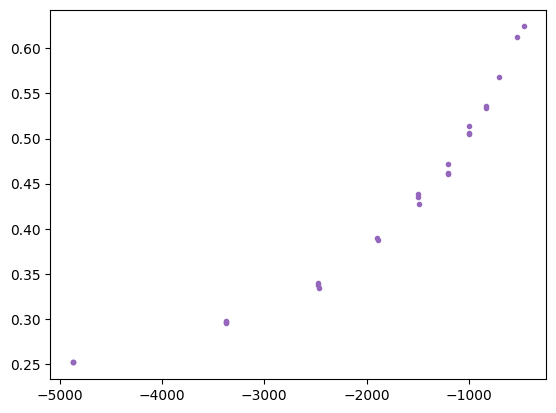

In [ ]:
plt.plot(x, y, '.', color='tab:purple')
pass

**Построим модель методом разделимых наименьших квадратов:**

In [7]:
#Находим значения параметров функции методом наименьших квадратов
coefficient, _ = curve_fit(function, x, y)
coefficient

array([ 2.01968512e-01, -6.19532854e-06,  1.20445629e+03, -1.81343033e+02])

Для точек разбиения (b3) найдем значения остальных параметров β , при которых значение функции является наименьшим.

\begin{align}
        \sum_{i=1}^n  ( \beta_1 - \beta_2x - \frac{\arctan(\frac{\beta_3}{x-\beta_4})}{\pi})^2
    \end{align}
    (2)

b3 = 1.20445629e+03 преобразуем в целое число => b3 = 1204.45629. 
Разобьем его на 30 точек с шагом 0.1

In [9]:
b3 = np.array([1202.6,1202.7,1202.8,1202.9,1203.0, 1203.1, 1203.2, 1203.3, 1203.4, 1203.5, 1203.6, 1203.7, 1203.8, 1203.9, 1204.0, 1204.1, 1204.2, 1204.3, 1204.4, 1204.5, 1204.6, 1204.7, 1204.8, 1204.9, 1205.0, 1205.1, 1205.2, 1205.3, 1205.4, 1205.5])

#Создадим массив, куда запишем значения функции при различных значениях b3
value_func = [0] * 30

for i in range(30):

    #Высчитываем параметры при b3[i]
    def func(x, b1, b2, b4):
        return b1-b2*x-(np.arctan(b3[i]/(x-b4))/np.pi)
    coef, _ = (curve_fit(func, x, y))
    b1, b2, b4 = coef

    #Высчитываем функцию (2) при b3[i]
    def f(x, y, b1, b2, b4):
        return sum((b1-b2*x-(np.arctan(b3[i]/(x-b4))/np.pi) - y)**2)
    
    value_func[i] = f(x, y, b1, b2, b4)

#Восстановим  остальные параметры функции, используя в качестве В3 элемент из массива b3 при котором значение функции минимально
b3 = b3[value_func.index(min(value_func))] 
print(b3)

def func(x, b1, b2, b4):
    return b1-b2*x-(np.arctan(b3/(x-b4))/np.pi)
    coef, _ = (curve_fit(func, x, y))
coef




1204.5


array([ 2.01718032e-01, -6.15747575e-06, -1.81882419e+02])

Построим график:

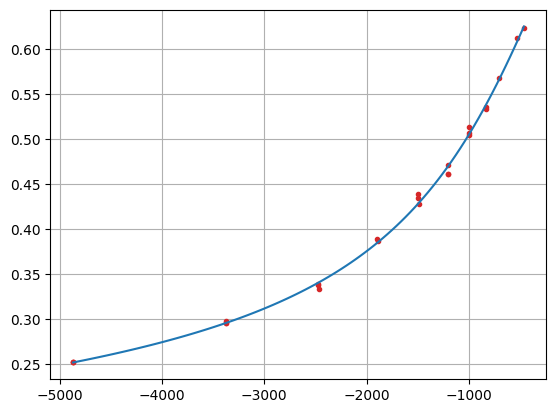

In [ ]:
XX = np.linspace(np.min(x), np.max(x), 100)
YY = b1 - b2 * XX - (np.arctan(b3/(XX - b4))/np.pi)
plt.plot(x, y, '.', color='tab:red')
plt.plot(XX, YY)
plt.grid()
pass

**Теперь постороим модель, используя аппроксимацию квадратным многочленом:**

(0.6866879378768793, 0.00019763582738335761, 2.2576126483911395e-08)

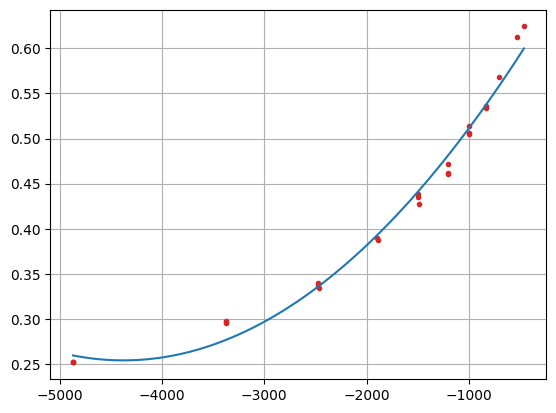

In [ ]:
#Найдем значения В с помощью функции polyfit, где 2 - степень многочлена, и построим график
p = np.polyfit(x, y, 2)
X = np.linspace(np.min(x), np.max(x), 100)
Y = np.polyval(p, X)
plt.plot(x, y, '.', color='tab:red')
plt.plot(X,Y)
plt.grid()
pass

**Сравним полученные результаты:**

При визуальном сравнении сравнении двух графиков, можно сделать вывод, что модель построенная, с использованием метода разделимых наименьших квадратов является точнее, той, что была построена с использованием аппроксимации квадратным многочленом.